In [339]:
import random
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import math
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/david/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


# Dr.'s visit data

In [11]:
zero_dict = {88: 0,
             77: np.nan,
             99: np.nan}

df['DRVISITS'] = df['DRVISITS'].replace(zero_dict)

In [44]:
DR_Visit_mean = df['DRVISITS'].mean()
DR_Visit_mean

6.113075170842825

In [43]:
DR_Visit_std = df['DRVISITS'].std()
DR_Visit_std

8.918145649488753

In [42]:
len_DR_Visit = df['DRVISITS'].count()
len_DR_Visit

10975

In [45]:
DR_Visit_CI = stats.norm.interval(
    0.95, loc=DR_Visit_mean, scale=DR_Visit_std/math.sqrt((len_DR_Visit)))
DR_Visit_CI

(5.946227408152203, 6.279922933533446)

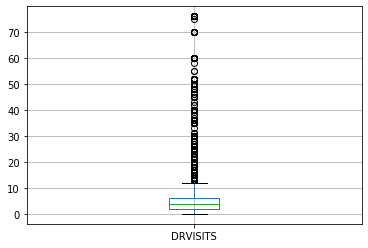

In [279]:
df.boxplot(column='DRVISITS')

We can say with 95% confidence that the mean number of Doctors Visits in the past 12 months for the population is  somewhere between 5.9 and 6.3

# Heavy Drinker Data

In [201]:
df['_RFDRHV5'] = df['_RFDRHV5'].replace({9: np.nan, 1: 'No', 2: 'Yes'})

In [202]:
p = df['_RFDRHV5'].value_counts(normalize=True)[1]

In [203]:
p

0.055742446631244696

In [96]:
sample_size = df['_RFDRHV5'].count()

In [102]:
z = stats.norm.interval(.95)

In [103]:
Heavy_Drinker_CI.append(p + z[0]*math.sqrt(p*(1-p)/sample_size))

In [104]:
Heavy_Drinker_CI.append(p + z[1]*math.sqrt(p*(1-p)/sample_size))

In [105]:
Heavy_Drinker_CI

[0.05322114396128652, 0.05826374930120287]

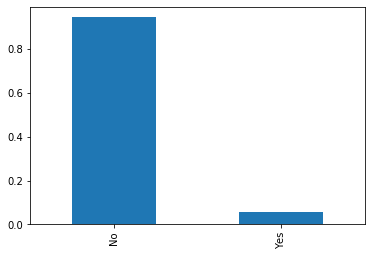

In [283]:
df['_RFDRHV5'].value_counts(normalize=True).plot(kind='bar')
plt.show()

We can say with 95% confidence that the population proportion of heavy drinkers is somewhere between 5.3% and 5.8%

# Exercise vs. Dr. Visit

In [106]:
zero_dict = {1: "Yes",
             2: "No",
             7: np.nan,
             9: np.nan}

df['EXERANY2'] = df['EXERANY2'].replace(zero_dict)

In [130]:
exercise_df = df.loc[df['EXERANY2'] == 'Yes']

In [131]:
exercise_df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
49943,9.0,1.0,1192017,1,19,2017,1100.0,2017000006,2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303767,36.0,7.0,8092017,8,9,2017,1200.0,2017012238,2.017012e+09,NaN,...,2.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,1.0
303768,36.0,9.0,10062017,10,6,2017,1200.0,2017012239,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303769,36.0,1.0,2282017,2,28,2017,1200.0,2017012240,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,2.0,NaN,NaN,9.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0


In [284]:
exercise = exercise_df['DRVISITS']

In [292]:
exercise.dropna(inplace=True)

/Users/david/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:4784: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [286]:
dont_exercise_df = df.loc[df['EXERANY2'] == 'No']

In [287]:
dont_exercise = dont_exercise_df['DRVISITS']

In [293]:
dont_exercise.dropna(inplace=True)

In [294]:
exercise.mean()

5.724377694340148

In [295]:
dont_exercise.mean()

7.2441977800201816

In [296]:
stats.ttest_ind(exercise, dont_exercise)

Ttest_indResult(statistic=-7.822887746941314, pvalue=5.675573753444454e-15)

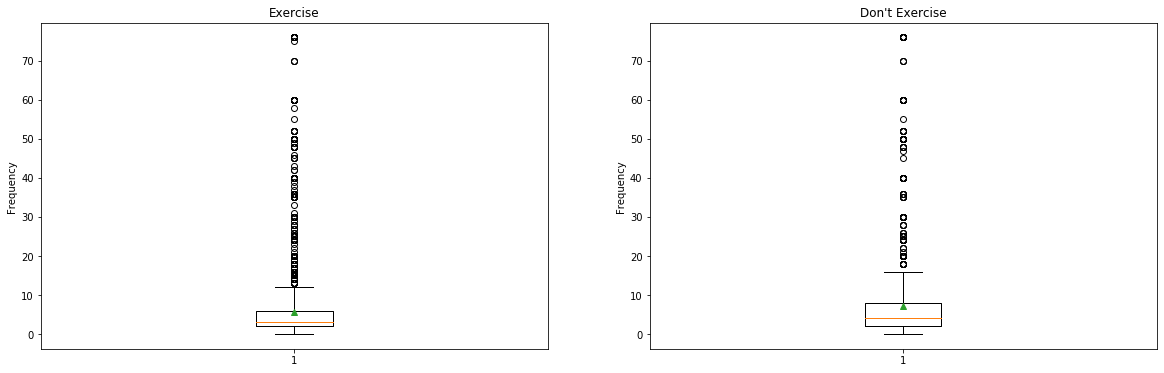

In [337]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].boxplot(exercise, showmeans=True)
axs[0].set_title('Exercise')
axs[1].boxplot(dont_exercise, showmeans=True)
axs[1].set_title("Don't Exercise")

for ax in axs.flat:
    ax.set(ylabel='Frequency')

plt.show()

The p-value is nearly 0, which implies that we should reject the null hypothesis, meaning that people who exercise do tend to go to the doctor less often.

# Exercise vs Drinker

In [193]:
exercise_2 = exercise_df['_RFDRHV5']

In [194]:
dont_exercise_2 = dont_exercise_df['_RFDRHV5']

In [204]:
p1 = exercise_2.value_counts(normalize=True)[1]

In [205]:
p2 = dont_exercise_2.value_counts(normalize=True)[1]

In [222]:
p1

0.059091109835269176

In [223]:
p2

0.04586364196769819

In [207]:
n1 = len(exercise_2)

In [208]:
n2 = len(dont_exercise_2)

In [217]:
both_df = df.loc[df['EXERANY2'].isin(['Yes', 'No'])]

In [218]:
both = both_df['_RFDRHV5']

In [219]:
p = both.value_counts(normalize=True)[1]

In [220]:
z = (p1-p2)/math.sqrt(p*(1-p)*(1/n1+1/n2))

In [221]:
z

4.460724843798125

In [324]:
exercise_2

49938      No
49939     Yes
49941      No
49942      No
49943     Yes
         ... 
303767     No
303768     No
303769     No
303775     No
303776     No
Name: _RFDRHV5, Length: 22643, dtype: object

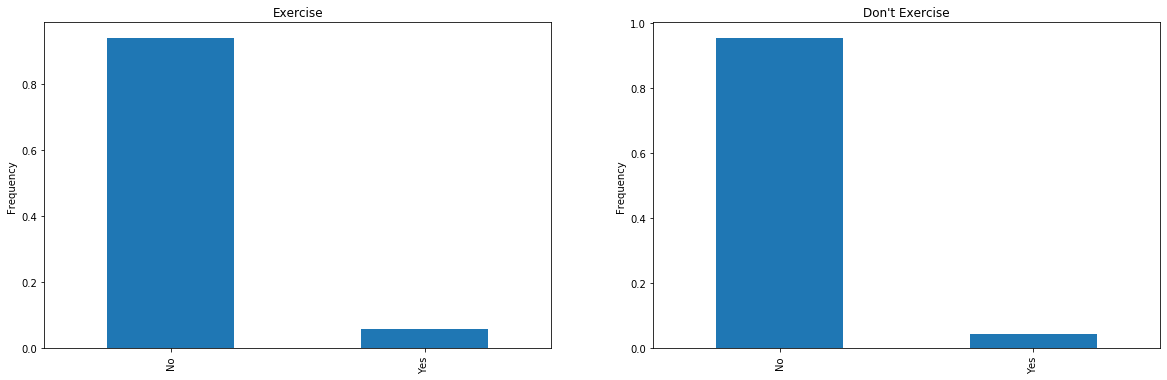

In [398]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# df[["a","b"]].plot(ax=axes[0],kind='bar')
# df[["c", "d"]].plot(ax=axes[1], kind='bar');

exercise_2.value_counts(normalize=True).plot(ax=axs[0], kind='bar')
axs[0].set_title('Exercise')
dont_exercise_2.value_counts(normalize=True).plot(ax=axs[1], kind='bar')
axs[1].set_title("Don't Exercise")

for ax in axs.flat:
    ax.set(ylabel='Frequency')

plt.show()

# exercise_1 = df['_RFDRHV5'].value_counts(normalize = True).plot(kind='bar')
# plt.show()

With a z score of 4.46, it would appear that a higher proportion of people who exercise are heavy drinkers than those who do not exercise, which was an unexpected revelation.

# Smokeless tobacco products vs. Dr's Visits

In [227]:
zero_dict = {1: "Every Day",
             2: "Some Days",
             3: "Not at all",
             7: np.nan,
             9: np.nan}

df['USENOW3'] = df['USENOW3'].replace(zero_dict)

In [232]:
df_dr_visit = df.loc[:, ['USENOW3', 'DRVISITS']]

In [236]:
anova_tobacco = ols('DRVISITS~USENOW3', data=df_dr_visit).fit()

In [237]:
anova_table = sm.stats.anova_lm(anova_tobacco, type=2)

In [238]:
print(anova_table)

               df         sum_sq     mean_sq         F    PR(>F)
USENOW3       2.0     244.173589  122.086794  1.548489  0.212617
Residual  10576.0  833838.616656   78.842532       NaN       NaN


In [359]:
dr_visit_everyday = df_dr_visit.loc[df_dr_visit['USENOW3']
                                    == 'Every Day']['DRVISITS']

In [360]:
dr_visit_everyday.dropna(inplace=True)

In [354]:
dr_visit_somedays = df_dr_visit.loc[df_dr_visit['USENOW3']
                                    == 'Some Days']['DRVISITS']

In [362]:
dr_visit_somedays.dropna(inplace=True)

In [364]:
dr_visit_not_at_all = df_dr_visit.loc[df_dr_visit['USENOW3']
                                      == "Not at all"]['DRVISITS']

In [365]:
dr_visit_not_at_all.dropna(inplace=True)

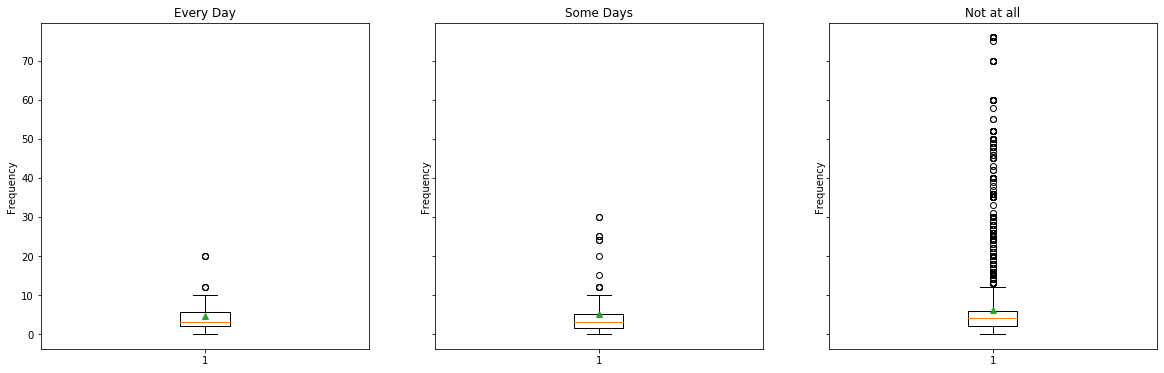

In [392]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharex='col', sharey='row')

axs[0].boxplot(dr_visit_everyday, showmeans=True)
axs[0].set_title('Every Day')
axs[1].boxplot(dr_visit_somedays, showmeans=True)
axs[1].set_title("Some Days")
axs[2].boxplot(dr_visit_not_at_all, showmeans=True)
axs[2].set_title("Not at all")

for ax in axs.flat:
    ax.set(ylabel='Frequency')

plt.show()

We fail to reject the null hypothesis that using smokeless tobacco products does not impact number of doctors visits in the last 12 months since the PR(>F) is .21

# Smokeless Tobacco Products vs. Drinker

In [269]:
drinker_df = df.loc[df['_RFDRHV5'] == 'Yes']

In [270]:
drinker_smokeless_tobacco = drinker_df['USENOW3']

In [272]:
drinker_smokeless_tobacco_chi_square = drinker_smokeless_tobacco.value_counts(
    normalize=True)

In [273]:
non_drinker_df = df.loc[df['_RFDRHV5'] == 'No']

In [274]:
non_drinker_smokeless_tobacco = non_drinker_df['USENOW3']

In [275]:
non_drinker_smokeless_tobacco_chi_square = non_drinker_smokeless_tobacco.value_counts(
    normalize=True)

In [276]:
drinker_smokeless_tobacco_chi_square

Not at all    0.969457
Some Days     0.017534
Every Day     0.013009
Name: USENOW3, dtype: float64

In [277]:
non_drinker_smokeless_tobacco_chi_square

Not at all    0.985136
Some Days     0.008718
Every Day     0.006146
Name: USENOW3, dtype: float64

In [253]:
table = [smokeless_tobacco_chi_square,
         non_drinker_smokeless_tobacco_chi_square]

In [254]:
stat, p, dof, expected = chi2_contingency(table)

In [255]:
print(p)

1.7177057375966687e-06


In [380]:
smoke_every_day = df.loc[df['USENOW3'] == 'Every Day']['_RFDRHV5']

In [381]:
smoke_every_day.dropna(inplace=True)

/Users/david/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/series.py:4784: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [382]:
smoke_every_day.value_counts(normalize=True)

No     0.888889
Yes    0.111111
Name: _RFDRHV5, dtype: float64

In [383]:
smoke_some_days = df.loc[df['USENOW3'] == "Some Days"]['_RFDRHV5']

In [384]:
smoke_some_days.dropna(inplace=True)

In [385]:
smoke_some_days.value_counts(normalize=True)

No     0.893836
Yes    0.106164
Name: _RFDRHV5, dtype: float64

In [386]:
smoke_not_at_all = df.loc[df['USENOW3'] == "Not at all"]['_RFDRHV5']

In [387]:
smoke_not_at_all.dropna(inplace=True)

In [388]:
smoke_not_at_all.value_counts(normalize=True)

No     0.945076
Yes    0.054924
Name: _RFDRHV5, dtype: float64

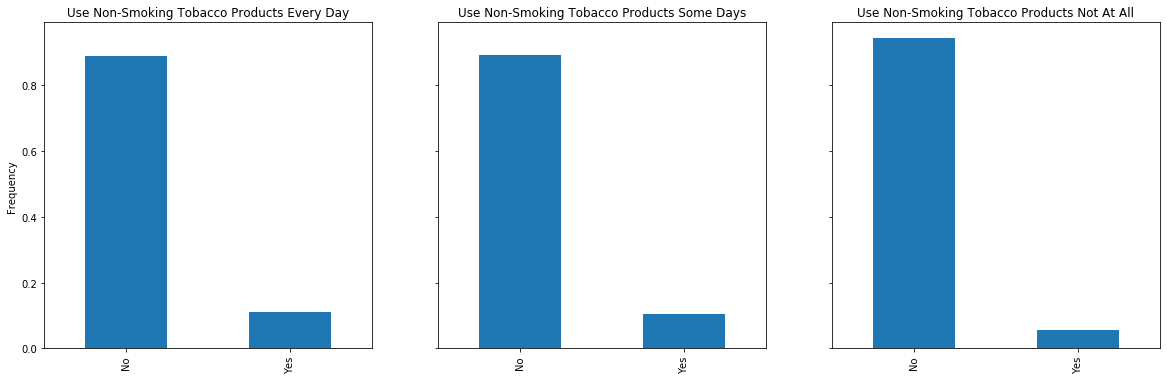

In [397]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharex='col', sharey='row')

# df[["a","b"]].plot(ax=axes[0],kind='bar')
# df[["c", "d"]].plot(ax=axes[1], kind='bar');

smoke_every_day.value_counts(normalize=True).plot(ax=axs[0], kind='bar')
axs[0].set_title('Use Non-Smoking Tobacco Products Every Day')
smoke_some_days.value_counts(normalize=True).plot(ax=axs[1], kind='bar')
axs[1].set_title("Use Non-Smoking Tobacco Products Some Days")
smoke_not_at_all.value_counts(normalize=True).plot(ax=axs[2], kind='bar')
axs[2].set_title("Use Non-Smoking Tobacco Products Not At All")

for ax in axs.flat:
    ax.set(ylabel='Frequency')

plt.show()

# exercise_1 = df['_RFDRHV5'].value_counts(normalize = True).plot(kind='bar')
# plt.show()

With a p-value of approximately zero, we can reject the null hypothesis, and state that there is a relationship between how much people use non-smoking tobacco products and alcohol abuse. From the graph, it looks as though people who don't use non-smoking tobacco products at all tend to drink less. 